<a href="https://colab.research.google.com/github/renatavel/goit_ds_homeworks/blob/main/hw_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
max_words = 5000
max_length = 150

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

In [4]:
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout

model_RNN = Sequential()
model_RNN.add(Embedding(input_dim = max_words, output_dim = 64))
model_RNN.add(SimpleRNN(128, activation='relu', return_sequences = False))
model_RNN.add(Dense(1, activation = 'sigmoid'))

In [5]:
model_RNN.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [6]:
history_RNN = model_RNN.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5844 - loss: 0.6580 - val_accuracy: 0.7888 - val_loss: 0.4512
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8151 - loss: 0.4166 - val_accuracy: 0.8089 - val_loss: 0.4368
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8576 - loss: 0.3394 - val_accuracy: 0.8310 - val_loss: 0.4123
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8826 - loss: 0.2890 - val_accuracy: 0.8402 - val_loss: 0.3703
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8875 - loss: 0.2783 - val_accuracy: 0.7535 - val_loss: 0.5365
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7936 - loss: 0.4446 - val_accuracy: 0.8326 - val_loss: 0.4308
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9137 - loss: 0.2247 - val_accuracy: 0.8513 - val_loss: 0.3547
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9246 - loss: 0.1948 - v

In [7]:
test_loss_RNN, test_accuracy_RNN = model_RNN.evaluate(x_test, y_test)
print(f"Test loss: {test_loss_RNN}")
print(f"Test accuracy: {test_accuracy_RNN}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8414 - loss: 0.4187
Test loss: 0.4027120769023895
Test accuracy: 0.843999981880188


In [8]:
from keras.layers import Bidirectional, LSTM

model_biLSTM = Sequential()
model_biLSTM.add(Embedding(input_dim = max_words, output_dim = 64))
model_biLSTM.add(Bidirectional(LSTM(32)))
model_biLSTM.add(Dense(1, activation = 'sigmoid'))

In [9]:
model_biLSTM.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [10]:
history_biLSTM = model_biLSTM.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6571 - loss: 0.5898 - val_accuracy: 0.8512 - val_loss: 0.3454
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8828 - loss: 0.2943 - val_accuracy: 0.8606 - val_loss: 0.3286
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9091 - loss: 0.2418 - val_accuracy: 0.8586 - val_loss: 0.3302
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9225 - loss: 0.2101 - val_accuracy: 0.8652 - val_loss: 0.3340
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9333 - loss: 0.1831 - val_accuracy: 0.8585 - val_loss: 0.3492
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9412 - loss: 0.1607 - val_accuracy: 0.8624 - val_loss: 0.3527
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9441 - loss: 0.1511 - val_accuracy: 0.8594 - val_loss: 0.3784
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9523 - loss: 0.1326 - val

In [11]:
test_loss_biLSTM, test_accuracy_biLSTM = model_biLSTM.evaluate(x_test, y_test)
print(f"Test loss: {test_loss_biLSTM}")
print(f"Test accuracy: {test_accuracy_biLSTM}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8527 - loss: 0.4914
Test loss: 0.48776453733444214
Test accuracy: 0.8537999987602234


In [12]:
from keras.layers import LSTM

model_deep_LSTM = Sequential()
model_deep_LSTM.add(Embedding(input_dim = max_words, output_dim = 64))
model_deep_LSTM.add(LSTM(64, return_sequences=True)),
model_deep_LSTM.add(LSTM(32)),
model_deep_LSTM.add(Dense(1, activation = 'sigmoid'))

In [13]:
model_deep_LSTM.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [14]:
history_deep_LSTM = model_deep_LSTM.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.6985 - loss: 0.5490 - val_accuracy: 0.8591 - val_loss: 0.3280
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8871 - loss: 0.2821 - val_accuracy: 0.8577 - val_loss: 0.3258
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9104 - loss: 0.2301 - val_accuracy: 0.8598 - val_loss: 0.3288
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9209 - loss: 0.2077 - val_accuracy: 0.8608 - val_loss: 0.3651
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9373 - loss: 0.1685 - val_accuracy: 0.8584 - val_loss: 0.3465
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9502 - loss: 0.1435 - val_accuracy: 0.8600 - val_loss: 0.3877
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9613 - loss: 0.1147 - val_accuracy: 0.8568 - val_loss: 0.4523
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9650 - loss: 0.1006 - v

In [15]:
test_loss_deep_LSTM, test_accuracy_deep_LSTM = model_deep_LSTM.evaluate(x_test, y_test)
print(f"Test loss: {test_loss_deep_LSTM}")
print(f"Test accuracy: {test_accuracy_deep_LSTM}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8470 - loss: 0.5990
Test loss: 0.5931145548820496
Test accuracy: 0.8463199734687805


In [16]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [17]:
from keras.layers import LSTM
def build_model(hp):
  model_LSTM = Sequential()
  model_LSTM.add(Embedding(input_dim=max_words, output_dim=hp.Choice('embedding_dim', [32,64,128])))
  model_LSTM.add(LSTM(hp.Int('lstm_units', min_value=32, max_value=256, step=32),
                 return_sequences= False,
                 activation=hp.Choice('activation', ['tanh', 'relu'])))

  model_LSTM.add(Dropout(hp.Choice('dropout', [0.2, 0.3, 0.5])))
  model_LSTM.add(Dense(1, activation='sigmoid'))

  learning_rate = hp.Choice('learning_rate', [0.001, 0.005, 0.0001])
  model_LSTM.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
  return model_LSTM

In [18]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 10,
    executions_per_trial = 1,
    directory = 'tuner_logs',
    project_name = 'rnn_models_testing'
    )

tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

history_LSTM = best_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

test_loss_LSTM, test_accuracy_LSTM = best_model.evaluate(x_test, y_test)
print('Test accuracy:', test_accuracy_LSTM)
print('Test loss:', test_loss_LSTM)

Trial 10 Complete [00h 03m 23s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.8716800212860107
Total elapsed time: 00h 24m 08s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 150, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,897 (722.25 KB)

 Trainable params: 184,897 (722.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9344 - loss: 0.1729 - val_accuracy: 0.8632 - val_loss: 0.3439 - learning_rate: 0.0050
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9509 - loss: 0.1335 - val_accuracy: 0.8660 - val_loss: 0.3982 - learning_rate: 0.0050
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9601 - loss: 0.1118 - val_accuracy: 0.8611 - val_loss: 0.4248 - learning_rate: 0.0050
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9717 - loss: 0.0802 - val_accuracy: 0.8600 - val_loss: 0.5204 - learning_rate: 0.0050
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9841 - loss: 0.0492 - val_accuracy: 0.8597 - val_loss: 0.5782 - learning_rate: 0.0025
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9924 - loss: 0.0278 - val_accuracy: 0.8589 - val_loss: 0.6894 - learning_rate: 0.0025
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8614 - loss: 0.3519
T

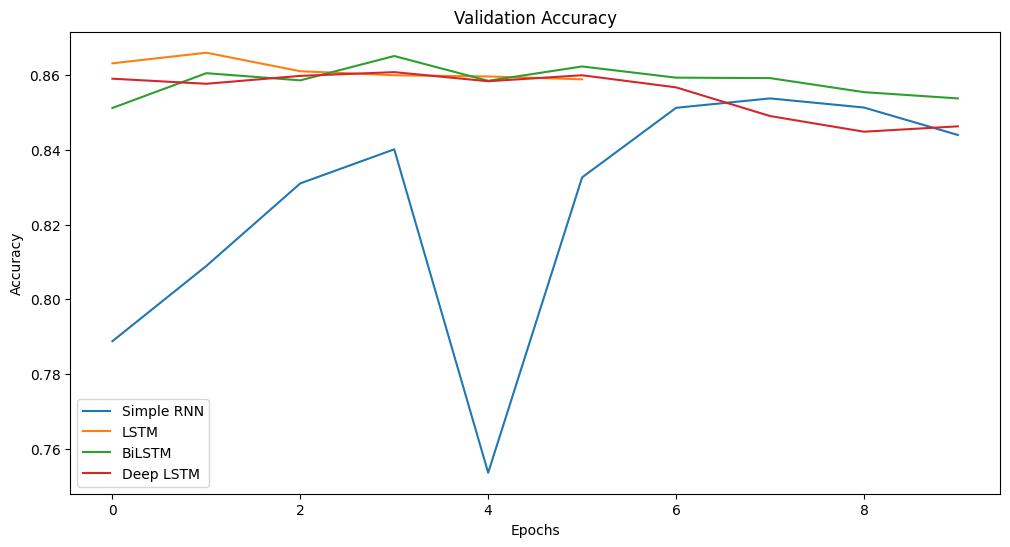

In [19]:
def plot_history(histories, names):
    plt.figure(figsize=(12, 6))
    for history, name in zip(histories, names):
        plt.plot(history.history['val_accuracy'], label=name)
    plt.title("Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_history([history_RNN, history_LSTM, history_biLSTM, history_deep_LSTM],
             ["Simple RNN", "LSTM", "BiLSTM", "Deep LSTM"])